# Dimensionality Reduction

This approach seeks to reduce the number of dimensions to the bearest minimum, two or a few, for better outputs. Generally in real life, the fewer the number of parameters in one's decission the easier and better the quality of decisions.

Some of the most popular techniques for achieving this includes PCA (Principal Component Analysis), LDA (Linear Discriminant Analysis), and t-SNE (t-distributed Stochastic Neighbor Embedding).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique used to transform data into a lower-dimensional space while retaining as much variance as possible. It works by finding the directions in the data that contain the most variation, and then projecting the data onto those directions.

A simple example is a 3D dataset below.

In [8]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

Principal components

In [9]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [10]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [11]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

Dimensions

In [12]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [13]:
X2D_using_svd = X2D

Doing it with scikit-learn

In [15]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [16]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [17]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [18]:
np.allclose(X2D, -X2D_using_svd)

True

## T-SNE Approach

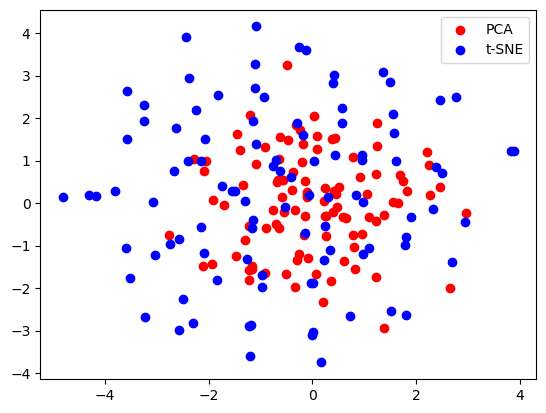

In [19]:
# Generate random data
data = np.random.rand(100, 1000)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(data)
pca_data = pca.transform(data)

# Perform t-SNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(data)

# Plot the results
plt.figure()
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='r', label='PCA')
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c='b', label='t-SNE')
plt.legend()
plt.show()

## Linear Discriminant Analysis (LDA)

This technique seeks to find a linear combination of features that best separates two or more classes. Unlike PCA, which maximizes variance, LDA aims to maximize the separation between different classes

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

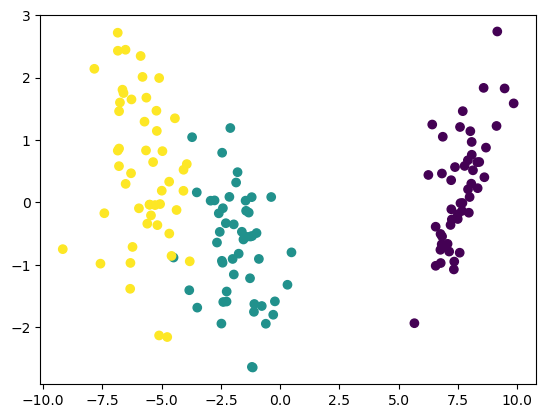

Accuracy: 1.00


In [20]:
"""
Implements a linear discriminant analysis algorithm to classify the Iris dataset.

This function performs the following steps:
1. Loads the Iris dataset from sklearn
2. Splits the data into training and testing sets (70% train, 30% test)
3. Creates and trains a Linear Discriminant Analysis model
4. Makes predictions on the test set
5. Calculates and returns the accuracy of the model

Returns:
float: The accuracy of the linear discriminant analysis model on the Iris dataset
"""
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Visualize the classifier results
transformed = lda.fit_transform(X, y)
xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys, c=y)
plt.show()

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Calculate and return the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")